In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/salader/dogs-vs-cats")

# generate api key from kaggle

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: premkharat
Your Kaggle Key: ··········


100%|██████████| 1.06G/1.06G [00:12<00:00, 94.2MB/s]


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
# conv2d takes feature
#maxpooling2d reduces the size of features
#flatten converts into single array

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels='inferred', # automatically checks the number of classes and labels them
    label_mode = 'int',
    batch_size=32, # at a time we process these many images
    image_size=(256,256) # converts image size to the given
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Print the first 'num_elements' batches of images and labels also shows the images are in color
num_elements = 1
for images, labels in train_ds.take(num_elements):
    print("Batch of images:", images)
    print("Batch of labels:", labels)


# the final output is
# shape=(32, 256, 256, 3), dtype=float32) 32 images in a batch size of the image and the 3 shows that the image is color
#Batch of labels: tf.Tensor([0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1], shape=(32,), dtype=int32)

Batch of images: tf.Tensor(
[[[[233.6489    188.6489    182.6489   ]
   [232.86856   189.86856   182.86856  ]
   [231.29459   190.29459   184.29459  ]
   ...
   [187.89062   203.65625   199.50781  ]
   [ 73.74609    79.03516    86.74609  ]
   [ 21.250458   25.250458   34.250458 ]]

  [[231.09375   187.47656   180.78516  ]
   [232.42969   189.42969   182.42969  ]
   [230.73532   189.73532   183.73532  ]
   ...
   [188.31735   204.08298   199.93454  ]
   [ 76.195526   81.48459    89.195526 ]
   [ 21.946686   25.946686   34.946686 ]]

  [[231.9336    188.9336    181.9336   ]
   [233.70123   192.25095   184.73438  ]
   [232.0039    191.76953   185.38672  ]
   ...
   [188.98465   204.75027   200.60184  ]
   [ 79.52734    84.81641    92.52734  ]
   [ 21.49057    25.49057    34.49057  ]]

  ...

  [[187.60977    78.77707    95.36139  ]
   [147.21106    96.820435   93.60654  ]
   [144.31195    95.671875   90.72629  ]
   ...
   [213.38281   229.38281   228.38281  ]
   [213.        229.        2

In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) # to bring the images in the range of 0-1
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# image / 255.: Divides the pixel values of the image by 255. This operation scales down the pixel values to the range of [0, 1],
# which is often preferred in deep learning to ensure numerical stability.

# tf.cast(..., tf.float32): Converts the image tensor to the tf.float32 data type.
# This is often required because neural networks expect inputs to be of a specific data type.



# This preprocessing step is important because neural networks are sensitive to the scale of input data,
# and ensuring that all input data is processed consistently can improve the model's convergence and performance.
# Additionally, casting the data to the appropriate data type is crucial to match the data type expectations of the neural network layers.


"\nThis preprocessing step is important because neural networks are sensitive to the scale of input data,\nand ensuring that all input data is processed consistently can improve the model's convergence and performance.\nAdditionally, casting the data to the appropriate data type is crucial to match the data type expectations of the neural network layers.\n"

In [8]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
# create CNN model

model = Sequential()

# convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # to reduce the size of the image
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# till here we have used 3 convolutional layers

model.add(Flatten()) # to convert the matrix in single column
# till here

# neural network (ANN)
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


# model.add(Conv2D(...)):
# This is adding a 2D convolutional layer to your CNN model.
#A convolutional layer is a fundamental building block of CNNs, used to extract features from images.

# 32:
# This is the number of filters or kernels you are using in this convolutional layer.
#Each filter detects different features in the input image.
#Increasing the number of filters can potentially allow the network to learn more complex patterns.

# kernel_size=(3, 3):
# This parameter specifies the size of the convolutional kernels or filters.
#In this case, the kernel size is 3x3, which means each filter will slide over a 3x3 patch of the input image at a time, performing a dot product operation to extract features.

# padding='valid':
# The padding parameter determines how the convolutional filters move across the input image.
#'valid' means no padding is added, so the filters will only be applied to positions where they completely overlap with the input image.
#This can result in the output feature maps being smaller than the input.

# activation='relu':
# The activation parameter specifies the activation function to be applied to the output of the convolutional layer.
#'relu' stands for Rectified Linear Unit and is a commonly used activation function that introduces non-linearity to the network.

# input_shape=(256, 256, 3):
# This parameter specifies the shape of the input data that will be fed into the model.
# In this case, it's a 3D shape representing an image with a height of 256 pixels, a width of 256 pixels, and 3 color channels
# (typically Red, Green, and Blue).


# model.add(MaxPooling2D(...)):
# This is adding a 2D MaxPooling layer to your CNN model.
# MaxPooling is a technique used to downsample the spatial dimensions of the feature maps produced by convolutional layers,
# while retaining the most important information.

# pool_size=(2, 2):
# This parameter specifies the size of the pooling window. In this case, the pooling window is 2x2.
# MaxPooling works by taking the maximum value within each window and using it as the representative value for that window.
# By using a 2x2 window, the dimensions of the feature maps will be halved in both the height and width.

# strides=2:
# The strides parameter determines how much the pooling window moves across the feature map at each step.
# A stride of 2 means that the pooling window will move 2 units at a time.
# This leads to non-overlapping pooling regions, which can help reduce the dimensionality of the feature maps.



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)
# the loss of training must decrease and of accuracy it should increase

Epoch 1/5
625/625 [==============================] - 84s 105ms/step - loss: 0.6220 - accuracy: 0.6482 - val_loss: 0.5293 - val_accuracy: 0.7310
Epoch 2/5
625/625 [==============================] - 66s 105ms/step - loss: 0.4954 - accuracy: 0.7578 - val_loss: 0.5326 - val_accuracy: 0.7576
Epoch 3/5
625/625 [==============================] - 66s 104ms/step - loss: 0.4017 - accuracy: 0.8113 - val_loss: 0.5009 - val_accuracy: 0.7946
Epoch 4/5
625/625 [==============================] - 62s 98ms/step - loss: 0.2820 - accuracy: 0.8791 - val_loss: 0.5825 - val_accuracy: 0.7900
Epoch 5/5
625/625 [==============================] - 57s 90ms/step - loss: 0.1603 - accuracy: 0.9352 - val_loss: 0.7205 - val_accuracy: 0.7934


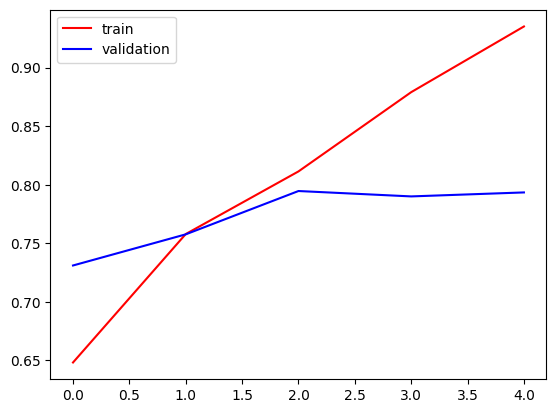

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

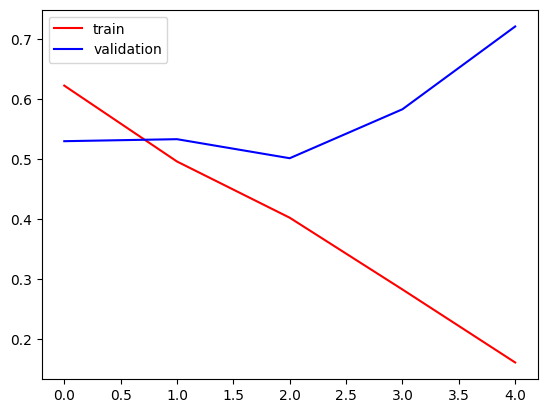

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2
import matplotlib.pyplot as plt

In [19]:
test_img = cv2.imread('/content/dogs-vs-cats/test/cats/cat.10.jpg')

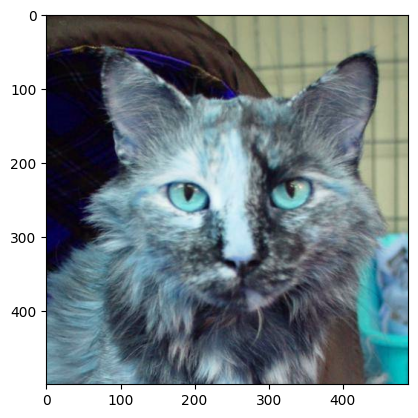

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(499, 489, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256)) # to resize the image with the given dimensions

In [23]:
test_input = test_img.reshape((1,256,256,3)) # 3 indicates color image and 1 indicates b/w image

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 367ms/step


array([[0.]], dtype=float32)

In [ ]:
#how to load model
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/b_CNN.h5')
test_img = cv2.imread("/content/cat-551554_640.jpg")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
output=model.predict(test_input)
print("%%%%%%%",output)
if output==1:
  print("Dog")
else:
  print("hey its Cat")